In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('./src')
from geometry import *
from tubes import closed_geometry
from solver import stokes2d

In [2]:
p1 = np.array([-10,-1])
curve1 = line

p2 = np.array([-1,-1])
curve2 = line

p3 = np.array([-1,-10])
curve3 = cap

p4 = np.array([1,-10])
curve4 = line

p5 = np.array([1,-1])
curve5 = line

p6 = np.array([10,-1])
curve6 = cap

p7 = np.array([10,1])
curve7 = line

p8 = np.array([1,1])
curve8 = line

p9 = np.array([1,10])
curve9 = cap

p10 = np.array([-1,10])
curve10 = line

p11 = np.array([-1,1])
curve11 = line

p12 = np.array([-10,1])
curve12 = cap

In [3]:
pts = [p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12]
curves = [curve1, curve2, curve3, curve4, curve5, curve6, curve7, curve8, curve9, curve10, curve11, curve12]

In [4]:
cross = closed_geometry(pts,curves)

In [5]:
cross.build_geometry(5e-2)

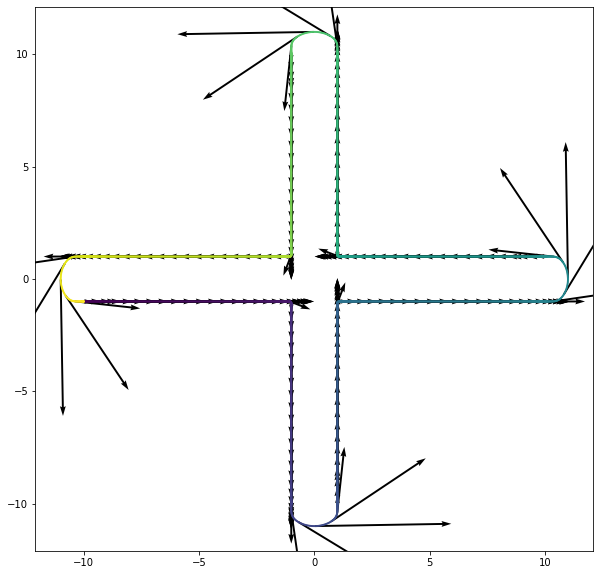

In [6]:
plt.figure(figsize=(10,10))
n = 16
plt.quiver(cross.x[::n], cross.y[::n], (cross.dx_da*cross.da)[::n],(cross.dy_da*cross.da)[::n], scale=0.2)
plt.scatter(cross.x,cross.y,c=cross.a,s=1)

# testing points

In [7]:
left = -10
right = 10
up = 10
bottom = -10
x1 = np.linspace(left,right,400)
y1= np.linspace(-0.9,0.9,40)
z1 = ((x1[:,np.newaxis]) + (y1[np.newaxis,:]*1j)).flatten()
z2 = z1*np.exp(1j*np.pi)
z = np.concatenate((z1,z2))

# solvers, pressure drops, velocity field

In [8]:
inflow = cross.caps[0]
outflows = cross.caps[1:]
flows = [(inflow,outflow) for outflow in outflows]

In [9]:
def get_boundary_velocity_conditions(flow):
    velocity = []
    for i,c in enumerate(cross.curves):
        if i == flow[0]:
            velocity.append(c.get_velocity(flux=1))
        elif i == flow[1]:
            velocity.append(c.get_velocity(flux=-1))
        else:
            velocity.append(c.get_velocity(flux=0))
    return np.concatenate(velocity)

flows_boundary_conditions = [get_boundary_velocity_conditions(flow) for flow in flows]

In [10]:
solver = stokes2d(cross,gmres_tol=1e-12)

In [11]:
flows_omega = [solver.solve(flows_boundary_condition) for flows_boundary_condition in flows_boundary_conditions]

gmres starts solving the Nystorm, please wait...
gmres converged
gmres starts solving the Nystorm, please wait...
gmres converged
gmres starts solving the Nystorm, please wait...


KeyboardInterrupt: 

In [ ]:
solver.clean_A()

In [ ]:
from tqdm import tqdm

In [ ]:
velocity_fields = [solver.compute_velocity(z,omega) for omega in flows_omega]
mid_point = np.array([0,0])
pressure_drops = 
for i,f in enumerate(flows):
    p1 = cross.curves[f[0]].p
    l1 = line(p1,mid_point)
    l1.build(1e-3)
    pressure_drop1 = np.sum(solver.compute_grad_pressure(l1.get_t(),flows_omega[i]) * l1.get_dt_da() * l1.da)
    
    p2 = cross.curves[i[1]].p
    l2 = line(mid_point,p2)
    l2.build(1e-3)
    pressure_drop1 = np.sum(solver.compute_grad_pressure(l2.get_t(),flows_omega[i]) * l2.get_dt_da() * l2.da)
